In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv('../data/processed/0.1-initial-exploration.csv')

In [7]:
# Data frame depicting the features below
df = df.loc[:,['gridStart', 'position', 'positionText', 'positionOrder', 'pointsGained'
,'laps','time_x','milliseconds','fastestLapTime','fastestLapSpeed']]

In [20]:
df.describe()

,gridStart,positionOrder,pointsGained,laps
count,25554.000000,25554.000000,25554.000000,25554.000000
mean,11.191320,12.922713,1.806588,46.071535
std,7.272781,7.741106,4.053737,30.437486
min,0.000000,1.000000,0.000000,0.000000
25%,5.000000,6.000000,0.000000,21.000000
50%,11.000000,12.000000,0.000000,52.000000
75%,17.000000,19.000000,2.000000,67.000000
max,34.000000,39.000000,50.000000,200.000000


In [23]:
df.tail(20)

,gridStart,position,positionText,positionOrder,pointsGained,laps,time_x,milliseconds,fastestLapTime,fastestLapSpeed
25534,19,\N,R,20,0.0,0,\N,\N,\N,\N
25535,19,17,17,17,0.0,61,\N,\N,1:20.402,219.800
25536,20,19,19,19,0.0,64,\N,\N,1:23.641,200.270
25537,20,19,19,19,0.0,64,\N,\N,1:24.040,200.261
25538,19,17,17,17,0.0,75,\N,\N,1:16.866,156.287
25539,18,14,14,14,0.0,51,+14.315,8030725,1:47.747,200.569
25540,18,20,20,20,0.0,52,\N,\N,1:39.317,211.758
25541,20,18,18,18,0.0,68,\N,\N,1:10.951,219.092
25542,20,19,19,19,0.0,69,\N,\N,1:09.757,222.842
25543,19,17,17,17,0.0,51,\N,\N,1:32.909,228.262


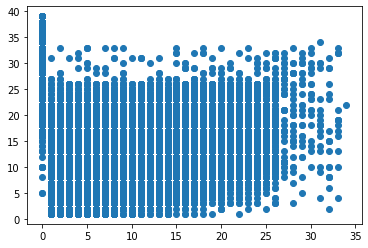

In [24]:
plt.scatter(df.loc[:, 'gridStart'], df.loc[:,'positionOrder'])

In [27]:
# correlation coefficient of starting and finishing position 
r = np.corrcoef(df.loc[:, 'gridStart'], df.loc[:,'positionOrder'])
r

In [54]:
# I would suggest to drop position and positionText because they both convey the same information as positionOrder.
# The only Additional information they provide is whether the driver finished the race, which is a feature itself.

df.drop(columns=['position', 'positionText'])

,gridStart,positionOrder,pointsGained,laps,time_x,milliseconds,fastestLapTime,fastestLapSpeed
0,1,1,10.0,58,1:34:50.616,5690616,1:27.452,218.300
1,9,5,4.0,56,+46.548,5525103,1:35.462,209.033
2,3,13,0.0,56,\N,\N,1:35.520,203.969
3,5,3,6.0,66,+4.187,5903238,1:22.017,204.323
4,3,2,8.0,58,+3.779,5213230,1:26.529,222.085
...,...,...,...,...,...,...,...,...
25549,18,20,0.0,56,\N,\N,1:35.438,201.353
25550,17,17,0.0,54,\N,\N,1:42.886,192.900
25551,15,18,0.0,68,\N,\N,1:21.402,190.344
25552,19,17,0.0,69,\N,\N,1:14.954,206.958


In [57]:
df['gridStart'].value_counts()
# I do not really understand how people start at position 0.


0     1604
1     1088
5     1079
7     1079
10    1073
11    1071
4     1070
8     1070
9     1068
6     1066
3     1066
13    1064
2     1063
12    1063
14    1054
15    1049
16    1034
17    1022
18     987
19     973
20     937
21     698
22     656
23     456
24     429
25     302
26     249
27      53
28      32
29      25
30      21
31      19
32      18
33      15
34       1
Name: gridStart, dtype: int64

In [58]:
zeros_starting_df = df.loc[df['gridStart'] == 0]

In [59]:
zeros_starting_df.tail(20)
# or does gridStart 0 suggest starting from the box?

,gridStart,position,positionText,positionOrder,pointsGained,laps,time_x,milliseconds,fastestLapTime,fastestLapSpeed
23804,0,\N,W,18,0.0,0,\N,\N,\N,\N
24119,0,17,17,17,0.0,68,\N,\N,1:17.309,203.075
24136,0,10,10,10,1.0,69,\N,\N,1:19.457,198.492
24197,0,\N,R,22,0.0,2,\N,\N,1:18.302,198.891
24362,0,\N,W,20,0.0,0,\N,\N,\N,\N
24404,0,\N,R,17,0.0,48,\N,\N,1:21.889,146.701
24425,0,10,10,10,1.0,78,+25.056,6583476,1:19.816,150.511
24583,0,\N,R,18,0.0,34,\N,\N,1:26.563,138.779
24983,0,13,13,13,0.0,69,\N,\N,1:22.736,190.625
25120,0,\N,R,17,0.0,38,\N,\N,1:45.712,204.430


In [60]:
# No missing values!
df['pointsGained'].value_counts()

0.00     18042
2.00      1063
4.00      1046
6.00      1024
1.00      1006
3.00       833
10.00      547
9.00       440
8.00       408
12.00      228
15.00      223
18.00      223
25.00      216
5.00       137
1.50        24
26.00       15
7.00        13
19.00       11
16.00        9
0.50         6
1.33         6
13.00        6
4.50         4
11.00        4
20.00        2
27.00        2
6.50         2
8.50         2
50.00        1
36.00        1
4.14         1
3.50         1
2.50         1
7.50         1
12.50        1
24.00        1
30.00        1
8.14         1
3.14         1
6.14         1
Name: pointsGained, dtype: int64

In [61]:
# No missing values!
df['laps'].value_counts()

0      2501
53      877
70      873
52      752
56      723
       ... 
189       1
173       1
163       1
147       1
175       1
Name: laps, Length: 172, dtype: int64

In [63]:
# I would suggest droping the time_x and milliseconds features since 73% of the data is \N which i suppose 
# means not available
df['time_x'].value_counts()
df['milliseconds'].value_counts()

\N          18745
14259460       10
10928200        6
11197800        4
12131000        4
            ...  
5083988         1
5610478         1
3560020         1
6179468         1
5347084         1
Name: milliseconds, Length: 6749, dtype: int64

In [69]:
# Sadly the same as above for fastestLapTime and fastestLapSpeed
df['fastestLapTime'].value_counts()


\N         18640
220.611        3
213.224        3
210.022        3
195.933        3
           ...  
174.634        1
193.731        1
243.369        1
222.032        1
211.237        1
Name: fastestLapSpeed, Length: 6520, dtype: int64

In [70]:
df['fastestLapSpeed'].value_counts()

\N         18640
220.611        3
213.224        3
210.022        3
195.933        3
           ...  
174.634        1
193.731        1
243.369        1
222.032        1
211.237        1
Name: fastestLapSpeed, Length: 6520, dtype: int64

In [72]:
df.sample(5)

,gridStart,position,positionText,positionOrder,pointsGained,laps,time_x,milliseconds,fastestLapTime,fastestLapSpeed
17298,0,\N,F,30,0.0,0,\N,\N,\N,\N
21483,7,3,3,3,4.0,65,+1:35.96,10990360,\N,\N
17757,19,\N,R,17,0.0,20,\N,\N,\N,\N
21196,4,31,31,31,0.0,42,\N,\N,\N,\N
18638,7,2,2,2,6.0,60,+1:58.6,8859500,\N,\N
